In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# Loading the data

In [2]:
# the MNIST dataset is part of the keras package, so we can load it directly from there:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Inspecting the data

In [3]:
# How much data do we have? 
print("Training Set Images:", len(y_train))
print("Testing Set Images:", len(X_test))

Training Set Images: 60000
Testing Set Images: 10000


In [4]:
# What do the data look like?
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
# What does the dependent (target) variable look like?
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# How many pixels per image?
X_train[0].shape

(28, 28)

In [9]:
# 28x28. this means our total amount of pixels is:
total_pixels = X_train[0].shape[0] * X_train[0].shape[1]
total_pixels

784

In [10]:
# How are colors represented? => HEX from 0 to 255
np.unique(X_train[0])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=uint8)

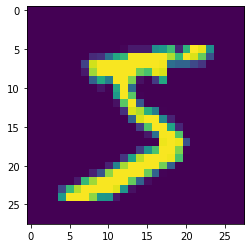

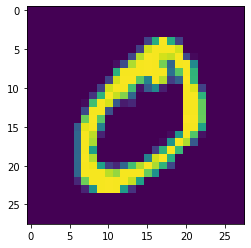

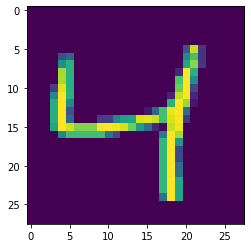

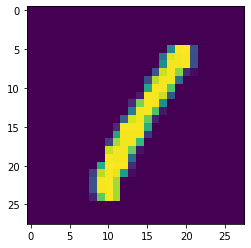

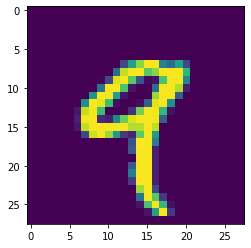

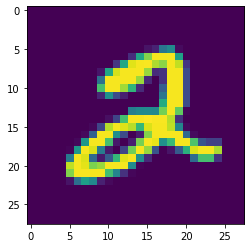

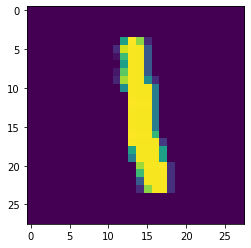

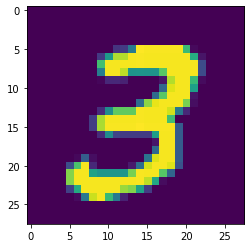

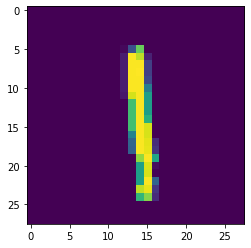

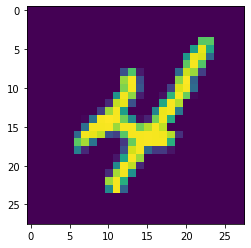

In [11]:
# They are arrays of pixels in black and white. 0 is a white pixel, 1 a black one.
# Let's visualize the first 10:

for i in range (10):
    plt.figure()
    plt.imshow(X_train[i])
    plt.show()

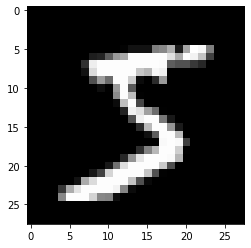

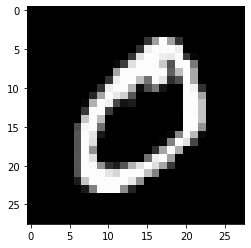

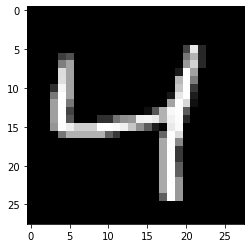

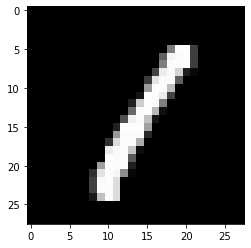

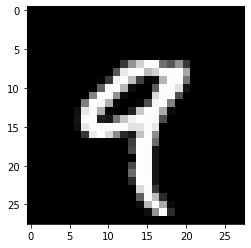

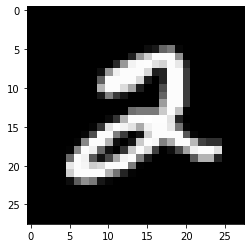

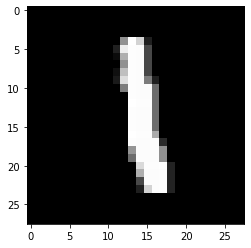

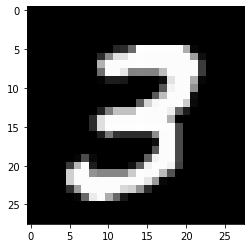

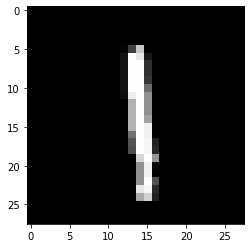

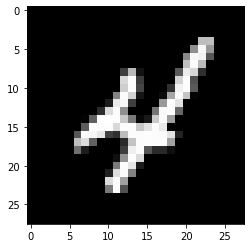

In [12]:
# Maybe color doesn't matter so much when looking at digits...
for i in range (10):
    plt.figure()
    plt.imshow(X_train[i], cmap='gist_gray')
    plt.show()

In [13]:
# right now our training data is made of 28x28 matrices.
# Let's reshape it into one vertical 784x1 vector to feed it into a CNN
X_train = X_train.reshape((X_train.shape[0], total_pixels)).astype('float')
X_test = X_test.reshape((X_test.shape[0], total_pixels)).astype('float')

In [14]:
# Let's inspect the result (used to be 6000, 28, 28)
X_train.shape

(60000, 784)

In [15]:
# recall our X_train cells have numbers ranging from 1 to 255, corresponding to color
# it is a lot more helpful to have those from 0 to 1. Let's fix that
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# checking a random pixel in the center
X_train[200][202]

0.0

In [17]:
# also, recall our target variable y ranges from 0 to 9.
# So we need to create 10 binary categories.
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

number_of_classes = y_train.shape[1]
y_train.shape

(60000, 10)

In [18]:
# Looking at the y-matrix you can see which column is which:
# (You may compare with the images above)
print(y_train[0]) # It's a 5

print(y_train[1]) # It's a 0

print(y_train[2]) # It's a 4

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# First Basic Model

In [19]:
# define baseline model, no additional hidden layers for now.
def baseline_model():
    model = Sequential()
    # input layer of size 784 for each pixel
    model.add(Dense(total_pixels, input_dim=total_pixels, kernel_initializer='normal', activation='relu'))
    # output layer of 10 catefories and nothig
    model.add(Dense(number_of_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# trying out the first basic model:
model1 = baseline_model()
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

2022-03-03 20:51:00.805896: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-03 20:51:01.311059: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
300/300 - 2s - loss: 0.2764 - accuracy: 0.9228 - val_loss: 0.1414 - val_accuracy: 0.9604
Epoch 2/20
300/300 - 1s - loss: 0.1115 - accuracy: 0.9673 - val_loss: 0.0890 - val_accuracy: 0.9729
Epoch 3/20
300/300 - 1s - loss: 0.0703 - accuracy: 0.9792 - val_loss: 0.0722 - val_accuracy: 0.9777
Epoch 4/20
300/300 - 1s - loss: 0.0506 - accuracy: 0.9850 - val_loss: 0.0691 - val_accuracy: 0.9782
Epoch 5/20
300/300 - 1s - loss: 0.0347 - accuracy: 0.9905 - val_loss: 0.0676 - val_accuracy: 0.9786
Epoch 6/20
300/300 - 1s - loss: 0.0255 - accuracy: 0.9936 - val_loss: 0.0706 - val_accuracy: 0.9777
Epoch 7/20
300/300 - 1s - loss: 0.0199 - accuracy: 0.9948 - val_loss: 0.0637 - val_accuracy: 0.9809
Epoch 8/20
300/300 - 1s - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.0581 - val_accuracy: 0.9820
Epoch 9/20
300/300 - 1s - loss: 0.0114 - accuracy: 0.9972 - val_loss: 0.0557 - val_accuracy: 0.9824
Epoch 10/20
300/300 - 1s - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0674 - val_accuracy: 0.9800

In [21]:
scores = model1.evaluate(X_test, y_test, verbose=2)
scores
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0638 - accuracy: 0.9843
Baseline Error: 1.57%


# First CNN (Convolutional Neural Network)

In [22]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [23]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [24]:
# we prepare the data slightly differently, as now the layers accept 2D
# we are therefore no longer interested in having pixels in 1 line
# but instead we want to have them in 28x28 grids to retain space info

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Swap from 0-255 to 0-1 (normalization of HEX)
X_train = X_train / 255
X_test = X_test / 255
# Creating categorical variables
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
# should be the same as above but re-writing for safety
number_of_classes = y_test.shape[1]

In [25]:
# building the model:

model2 = cnn_model()
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

Epoch 1/20
300/300 - 12s - loss: 0.2493 - accuracy: 0.9283 - val_loss: 0.0816 - val_accuracy: 0.9761
Epoch 2/20
300/300 - 11s - loss: 0.0715 - accuracy: 0.9785 - val_loss: 0.0509 - val_accuracy: 0.9830
Epoch 3/20
300/300 - 11s - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0515 - val_accuracy: 0.9831
Epoch 4/20
300/300 - 11s - loss: 0.0409 - accuracy: 0.9878 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 5/20
300/300 - 11s - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0392 - val_accuracy: 0.9874
Epoch 6/20
300/300 - 11s - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0402 - val_accuracy: 0.9868
Epoch 7/20
300/300 - 11s - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0349 - val_accuracy: 0.9887
Epoch 8/20
300/300 - 11s - loss: 0.0192 - accuracy: 0.9939 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 9/20
300/300 - 11s - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0362 - val_accuracy: 0.9891
Epoch 10/20
300/300 - 11s - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0333 - val_accura

In [26]:
scores = model2.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0321 - accuracy: 0.9908
CNN Error: 0.92%


# Second CNN, more advanced

In [27]:
# same type of input & style as the previous CNN
# But more hidden layers
def cnn_model2():
    model = Sequential()
    # input layer accepting 28x28 images in black and white
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    # Pooling them
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Convolution
    model.add(Conv2D(15, (3, 3), activation='relu'))
    # Another pool
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Randomly drop 20% of nodes to remove overfit
    model.add(Dropout(0.2))
    # Flatten the previous pooling operations
    model.add(Flatten())
    # two three dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(number_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [28]:
# building the model
model3 = cnn_model2()
history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)

Epoch 1/20
300/300 [==============================] - 18s 57ms/step - loss: 0.3913 - accuracy: 0.8788 - val_loss: 0.0901 - val_accuracy: 0.9717
Epoch 2/20
300/300 [==============================] - 17s 56ms/step - loss: 0.0998 - accuracy: 0.9690 - val_loss: 0.0549 - val_accuracy: 0.9822
Epoch 3/20
300/300 [==============================] - 17s 56ms/step - loss: 0.0715 - accuracy: 0.9780 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 4/20
300/300 [==============================] - 17s 57ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0336 - val_accuracy: 0.9884
Epoch 5/20
300/300 [==============================] - 17s 57ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0336 - val_accuracy: 0.9890
Epoch 6/20
300/300 [==============================] - 16s 54ms/step - loss: 0.0445 - accuracy: 0.9862 - val_loss: 0.0300 - val_accuracy: 0.9897
Epoch 7/20
300/300 [==============================] - 17s 57ms/step - loss: 0.0392 - accuracy: 0.9875 - val_loss: 0.0316 - val_accuracy:

In [29]:
scores = model3.evaluate(X_test, y_test, verbose=2)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

313/313 - 1s - loss: 0.0275 - accuracy: 0.9913
CNN Error: 0.87%


# Plotting 

In [30]:
import matplotlib.pyplot as plt

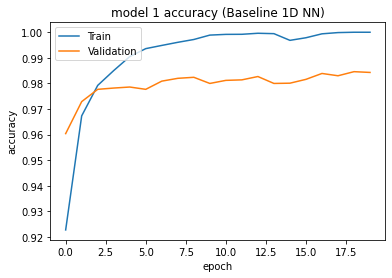

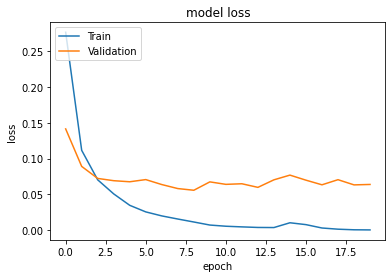

In [31]:
## PLOTTING MODEL 1

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy (Baseline 1D NN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

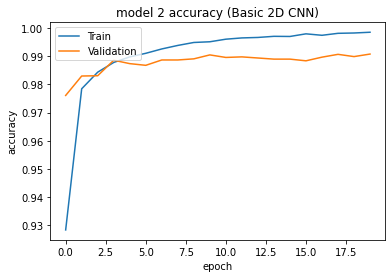

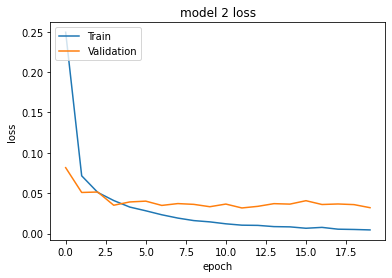

In [32]:
## PLOTTING MODEL 2

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy (Basic 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

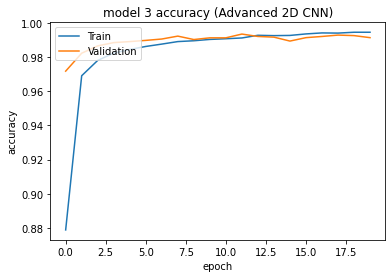

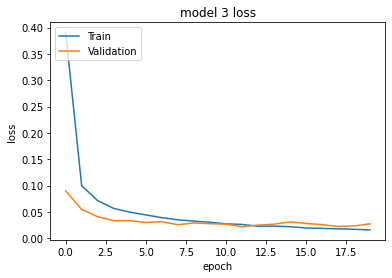

In [33]:
## PLOTTING MODEL 3

# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy (Advanced 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Let's play around with the amount of data on the training set

### Test run with only 5'000 train_set images instead of 60'000

Epoch 1/10
25/25 - 1s - loss: 0.8409 - accuracy: 0.7744 - val_loss: 0.4059 - val_accuracy: 0.8811
Epoch 2/10
25/25 - 0s - loss: 0.3020 - accuracy: 0.9166 - val_loss: 0.3055 - val_accuracy: 0.9099
Epoch 3/10
25/25 - 0s - loss: 0.2205 - accuracy: 0.9394 - val_loss: 0.2727 - val_accuracy: 0.9211
Epoch 4/10
25/25 - 0s - loss: 0.1713 - accuracy: 0.9560 - val_loss: 0.2529 - val_accuracy: 0.9239
Epoch 5/10
25/25 - 0s - loss: 0.1344 - accuracy: 0.9686 - val_loss: 0.2355 - val_accuracy: 0.9301
Epoch 6/10
25/25 - 0s - loss: 0.1081 - accuracy: 0.9760 - val_loss: 0.2245 - val_accuracy: 0.9322
Epoch 7/10
25/25 - 0s - loss: 0.0904 - accuracy: 0.9816 - val_loss: 0.2181 - val_accuracy: 0.9355
Epoch 8/10
25/25 - 0s - loss: 0.0728 - accuracy: 0.9868 - val_loss: 0.2140 - val_accuracy: 0.9366
Epoch 9/10
25/25 - 0s - loss: 0.0602 - accuracy: 0.9900 - val_loss: 0.2081 - val_accuracy: 0.9386
Epoch 10/10
25/25 - 0s - loss: 0.0487 - accuracy: 0.9928 - val_loss: 0.2056 - val_accuracy: 0.9392
Epoch 1/10
25/25 - 

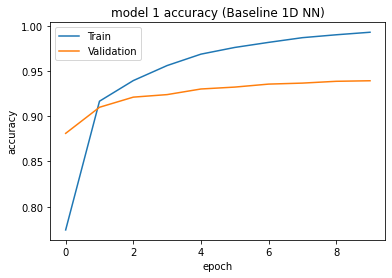

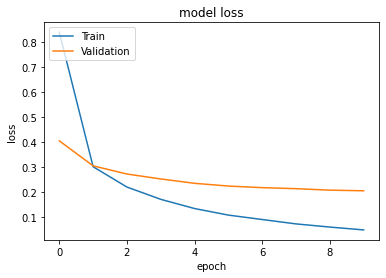

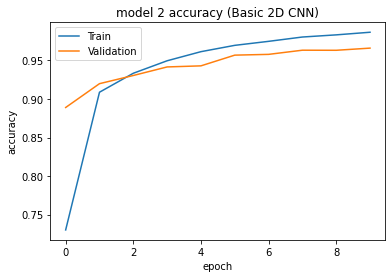

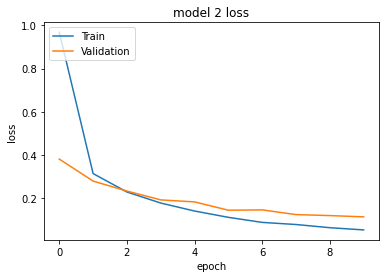

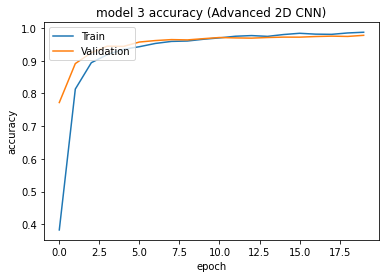

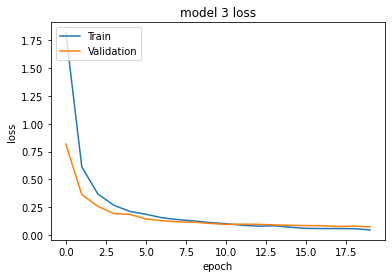

In [55]:
# 1D Data for model 1
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], total_pixels)).astype('float')
X_test = X_test.reshape((X_test.shape[0], total_pixels)).astype('float')

# normalizing
X_train = X_train / 255
X_test = X_test / 255

# categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Sampling the 1D data
X_train_sampled, y_train_sampled = X_train[:5000], y_train[:5000]

# training model 1
model1 = baseline_model()
history1 = model1.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# 2D Data for model 2
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalizing
X_train = X_train / 255
X_test = X_test / 255

# categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train_sampled, y_train_sampled = X_train[:5000], y_train[:5000]

# training model 2
model2 = cnn_model()
history2 = model2.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# 2D Data for model 3
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# normalizing
X_train = X_train / 255
X_test = X_test / 255

# categories
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

X_train_sampled, y_train_sampled = X_train[:5000], y_train[:5000]

# training model 3
model3 = cnn_model2()
history3 = model3.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=20, batch_size=200)

## PLOTTING MODEL 1

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy (Baseline 1D NN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## PLOTTING MODEL 2

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy (Basic 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## PLOTTING MODEL 3

# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model 3 accuracy (Advanced 2D CNN)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Trying the same for ranges of training images (500 to 10000)

Epoch 1/10
3/3 - 0s - loss: 2.1128 - accuracy: 0.3300 - val_loss: 1.5859 - val_accuracy: 0.6044
Epoch 2/10
3/3 - 0s - loss: 1.2476 - accuracy: 0.7660 - val_loss: 1.1152 - val_accuracy: 0.7134
Epoch 3/10
3/3 - 0s - loss: 0.7758 - accuracy: 0.8440 - val_loss: 0.8477 - val_accuracy: 0.7650
Epoch 4/10
3/3 - 0s - loss: 0.5323 - accuracy: 0.8820 - val_loss: 0.7235 - val_accuracy: 0.7830
Epoch 5/10
3/3 - 0s - loss: 0.4041 - accuracy: 0.8960 - val_loss: 0.6557 - val_accuracy: 0.7936
Epoch 6/10
3/3 - 0s - loss: 0.3155 - accuracy: 0.9160 - val_loss: 0.6091 - val_accuracy: 0.8064
Epoch 7/10
3/3 - 0s - loss: 0.2565 - accuracy: 0.9300 - val_loss: 0.5810 - val_accuracy: 0.8169
Epoch 8/10
3/3 - 0s - loss: 0.2183 - accuracy: 0.9420 - val_loss: 0.5571 - val_accuracy: 0.8235
Epoch 9/10
3/3 - 0s - loss: 0.1786 - accuracy: 0.9560 - val_loss: 0.5345 - val_accuracy: 0.8323
Epoch 10/10
3/3 - 0s - loss: 0.1459 - accuracy: 0.9680 - val_loss: 0.5202 - val_accuracy: 0.8383
Epoch 1/10
3/3 - 1s - loss: 2.2065 - ac

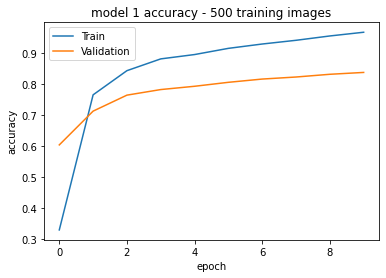

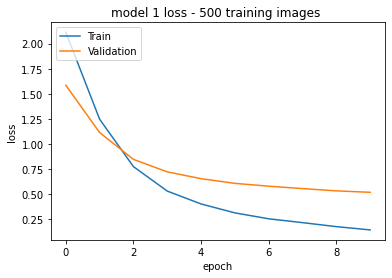

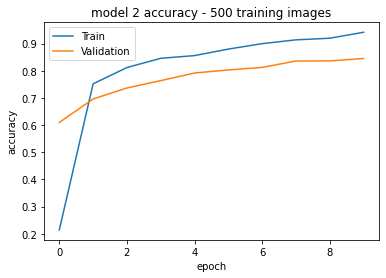

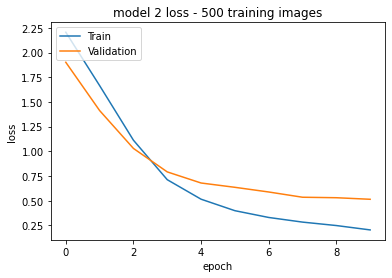

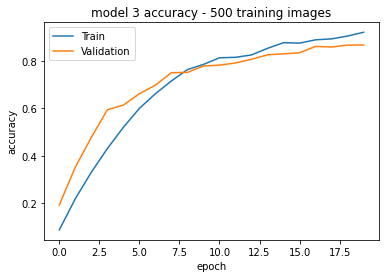

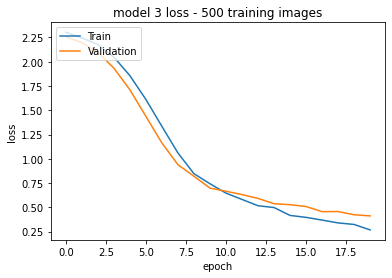

Epoch 1/10
5/5 - 0s - loss: 1.8154 - accuracy: 0.4680 - val_loss: 1.1947 - val_accuracy: 0.7372
Epoch 2/10
5/5 - 0s - loss: 0.8750 - accuracy: 0.8220 - val_loss: 0.7451 - val_accuracy: 0.8014
Epoch 3/10
5/5 - 0s - loss: 0.5324 - accuracy: 0.8750 - val_loss: 0.5707 - val_accuracy: 0.8300
Epoch 4/10
5/5 - 0s - loss: 0.3833 - accuracy: 0.9030 - val_loss: 0.4907 - val_accuracy: 0.8508
Epoch 5/10
5/5 - 0s - loss: 0.2986 - accuracy: 0.9210 - val_loss: 0.4433 - val_accuracy: 0.8636
Epoch 6/10
5/5 - 0s - loss: 0.2471 - accuracy: 0.9360 - val_loss: 0.4247 - val_accuracy: 0.8673
Epoch 7/10
5/5 - 0s - loss: 0.2028 - accuracy: 0.9500 - val_loss: 0.4046 - val_accuracy: 0.8740
Epoch 8/10
5/5 - 0s - loss: 0.1669 - accuracy: 0.9590 - val_loss: 0.3937 - val_accuracy: 0.8773
Epoch 9/10
5/5 - 0s - loss: 0.1410 - accuracy: 0.9760 - val_loss: 0.3873 - val_accuracy: 0.8811
Epoch 10/10
5/5 - 0s - loss: 0.1178 - accuracy: 0.9820 - val_loss: 0.3876 - val_accuracy: 0.8813
Epoch 1/10
5/5 - 1s - loss: 1.9756 - ac

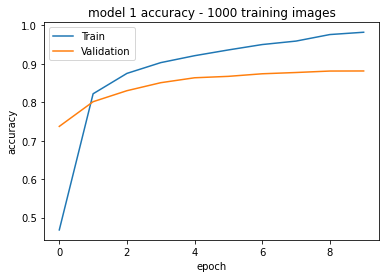

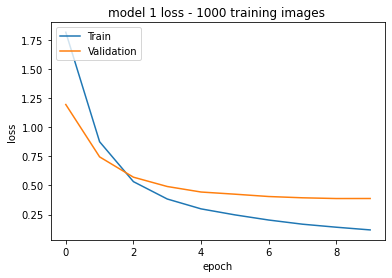

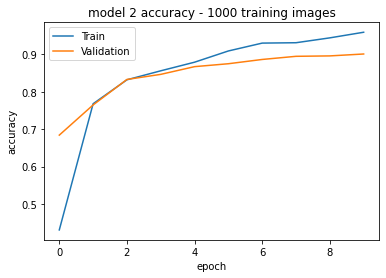

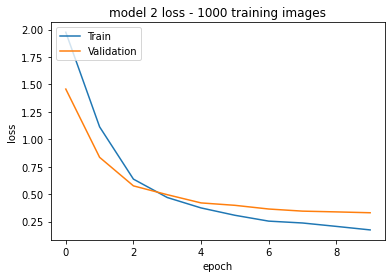

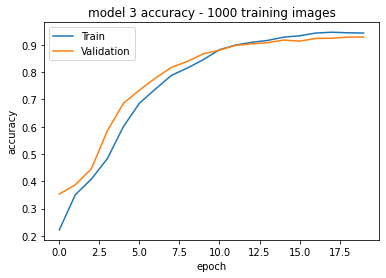

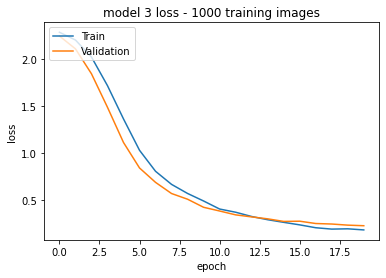

Epoch 1/10
8/8 - 1s - loss: 1.5701 - accuracy: 0.5680 - val_loss: 0.8444 - val_accuracy: 0.8193
Epoch 2/10
8/8 - 0s - loss: 0.6222 - accuracy: 0.8527 - val_loss: 0.5351 - val_accuracy: 0.8484
Epoch 3/10
8/8 - 0s - loss: 0.4015 - accuracy: 0.8913 - val_loss: 0.4470 - val_accuracy: 0.8683
Epoch 4/10
8/8 - 0s - loss: 0.3074 - accuracy: 0.9200 - val_loss: 0.3923 - val_accuracy: 0.8827
Epoch 5/10
8/8 - 0s - loss: 0.2439 - accuracy: 0.9367 - val_loss: 0.3799 - val_accuracy: 0.8871
Epoch 6/10
8/8 - 0s - loss: 0.2036 - accuracy: 0.9480 - val_loss: 0.3500 - val_accuracy: 0.8960
Epoch 7/10
8/8 - 0s - loss: 0.1680 - accuracy: 0.9627 - val_loss: 0.3518 - val_accuracy: 0.8935
Epoch 8/10
8/8 - 0s - loss: 0.1408 - accuracy: 0.9727 - val_loss: 0.3414 - val_accuracy: 0.8982
Epoch 9/10
8/8 - 0s - loss: 0.1229 - accuracy: 0.9780 - val_loss: 0.3413 - val_accuracy: 0.8945
Epoch 10/10
8/8 - 0s - loss: 0.1064 - accuracy: 0.9840 - val_loss: 0.3366 - val_accuracy: 0.8977
Epoch 1/10
8/8 - 1s - loss: 1.8224 - ac

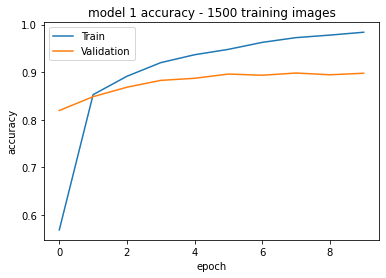

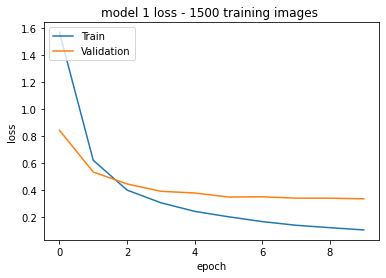

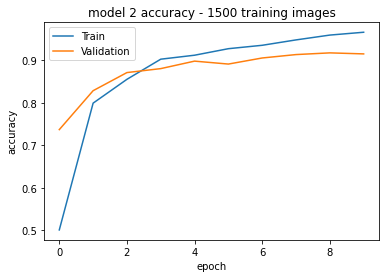

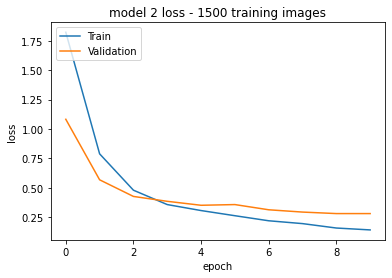

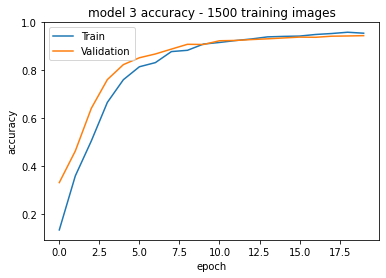

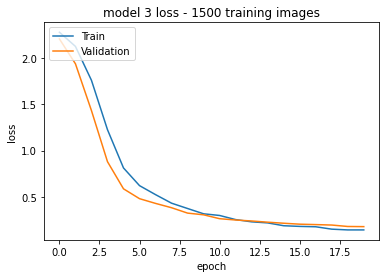

Epoch 1/10
10/10 - 1s - loss: 1.3676 - accuracy: 0.6530 - val_loss: 0.7264 - val_accuracy: 0.8109
Epoch 2/10
10/10 - 0s - loss: 0.5063 - accuracy: 0.8680 - val_loss: 0.4642 - val_accuracy: 0.8632
Epoch 3/10
10/10 - 0s - loss: 0.3373 - accuracy: 0.9105 - val_loss: 0.3863 - val_accuracy: 0.8841
Epoch 4/10
10/10 - 0s - loss: 0.2602 - accuracy: 0.9330 - val_loss: 0.3565 - val_accuracy: 0.8920
Epoch 5/10
10/10 - 0s - loss: 0.2144 - accuracy: 0.9480 - val_loss: 0.3456 - val_accuracy: 0.8985
Epoch 6/10
10/10 - 0s - loss: 0.1741 - accuracy: 0.9570 - val_loss: 0.3218 - val_accuracy: 0.9054
Epoch 7/10
10/10 - 0s - loss: 0.1462 - accuracy: 0.9690 - val_loss: 0.3161 - val_accuracy: 0.9063
Epoch 8/10
10/10 - 0s - loss: 0.1202 - accuracy: 0.9780 - val_loss: 0.3134 - val_accuracy: 0.9077
Epoch 9/10
10/10 - 0s - loss: 0.0993 - accuracy: 0.9855 - val_loss: 0.3048 - val_accuracy: 0.9090
Epoch 10/10
10/10 - 0s - loss: 0.0838 - accuracy: 0.9880 - val_loss: 0.3054 - val_accuracy: 0.9105
Epoch 1/10
10/10 - 

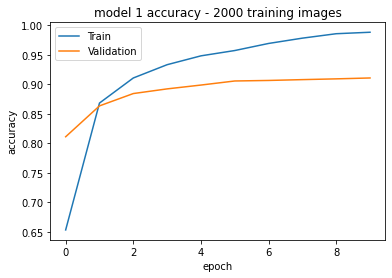

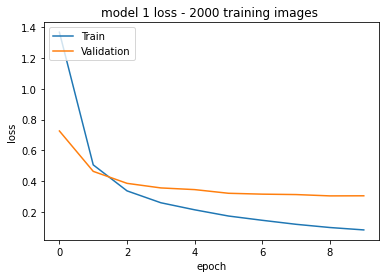

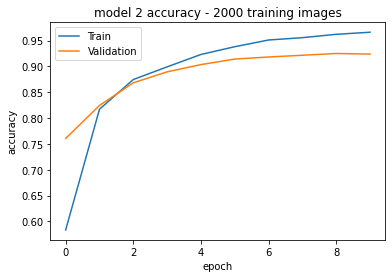

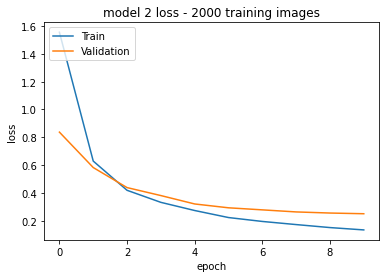

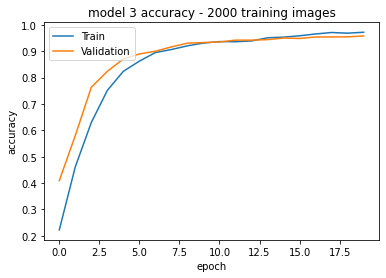

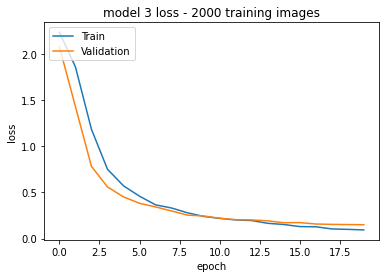

Epoch 1/10
13/13 - 1s - loss: 1.2501 - accuracy: 0.6632 - val_loss: 0.6036 - val_accuracy: 0.8387
Epoch 2/10
13/13 - 0s - loss: 0.4462 - accuracy: 0.8760 - val_loss: 0.4108 - val_accuracy: 0.8820
Epoch 3/10
13/13 - 0s - loss: 0.3078 - accuracy: 0.9180 - val_loss: 0.3540 - val_accuracy: 0.8978
Epoch 4/10
13/13 - 0s - loss: 0.2439 - accuracy: 0.9384 - val_loss: 0.3296 - val_accuracy: 0.9031
Epoch 5/10
13/13 - 0s - loss: 0.1979 - accuracy: 0.9476 - val_loss: 0.3212 - val_accuracy: 0.9068
Epoch 6/10
13/13 - 0s - loss: 0.1624 - accuracy: 0.9628 - val_loss: 0.2987 - val_accuracy: 0.9104
Epoch 7/10
13/13 - 0s - loss: 0.1420 - accuracy: 0.9696 - val_loss: 0.2915 - val_accuracy: 0.9127
Epoch 8/10
13/13 - 0s - loss: 0.1155 - accuracy: 0.9760 - val_loss: 0.2816 - val_accuracy: 0.9173
Epoch 9/10
13/13 - 0s - loss: 0.0948 - accuracy: 0.9848 - val_loss: 0.2746 - val_accuracy: 0.9198
Epoch 10/10
13/13 - 0s - loss: 0.0800 - accuracy: 0.9884 - val_loss: 0.2714 - val_accuracy: 0.9188
Epoch 1/10
13/13 - 

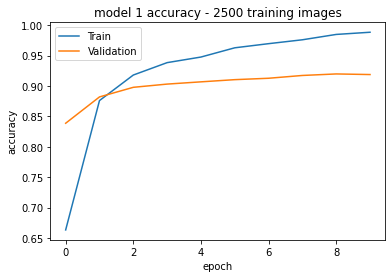

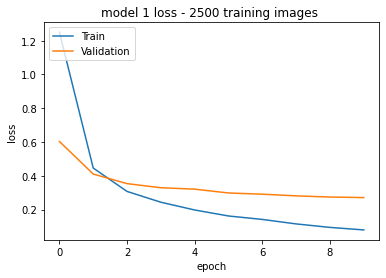

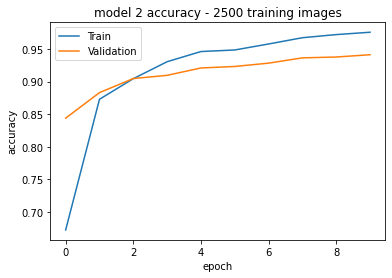

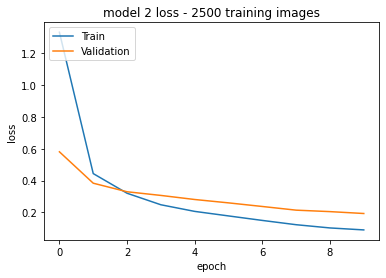

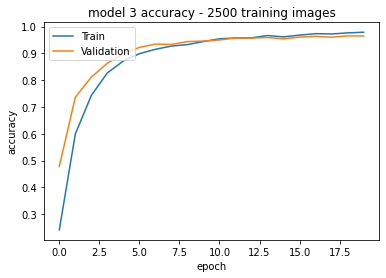

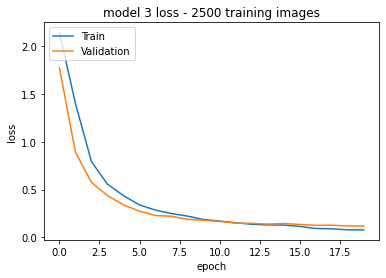

Epoch 1/10
15/15 - 1s - loss: 1.1041 - accuracy: 0.7167 - val_loss: 0.5162 - val_accuracy: 0.8588
Epoch 2/10
15/15 - 0s - loss: 0.3808 - accuracy: 0.8940 - val_loss: 0.3816 - val_accuracy: 0.8881
Epoch 3/10
15/15 - 0s - loss: 0.2671 - accuracy: 0.9263 - val_loss: 0.3223 - val_accuracy: 0.9073
Epoch 4/10
15/15 - 0s - loss: 0.2086 - accuracy: 0.9467 - val_loss: 0.3048 - val_accuracy: 0.9123
Epoch 5/10
15/15 - 0s - loss: 0.1705 - accuracy: 0.9583 - val_loss: 0.2970 - val_accuracy: 0.9130
Epoch 6/10
15/15 - 0s - loss: 0.1390 - accuracy: 0.9703 - val_loss: 0.2865 - val_accuracy: 0.9176
Epoch 7/10
15/15 - 0s - loss: 0.1180 - accuracy: 0.9750 - val_loss: 0.2694 - val_accuracy: 0.9209
Epoch 8/10
15/15 - 0s - loss: 0.0980 - accuracy: 0.9817 - val_loss: 0.2728 - val_accuracy: 0.9185
Epoch 9/10
15/15 - 0s - loss: 0.0801 - accuracy: 0.9850 - val_loss: 0.2707 - val_accuracy: 0.9190
Epoch 10/10
15/15 - 0s - loss: 0.0690 - accuracy: 0.9880 - val_loss: 0.2736 - val_accuracy: 0.9177
Epoch 1/10
15/15 - 

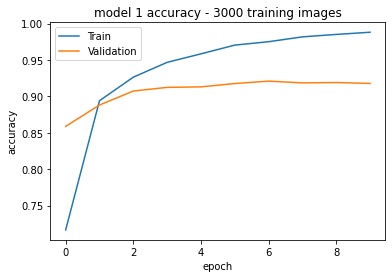

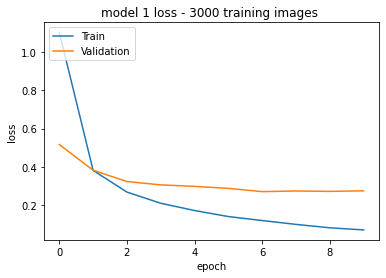

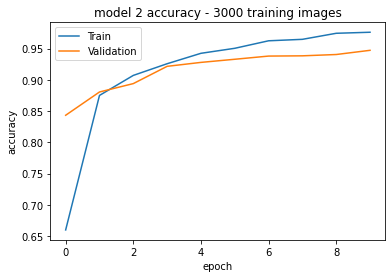

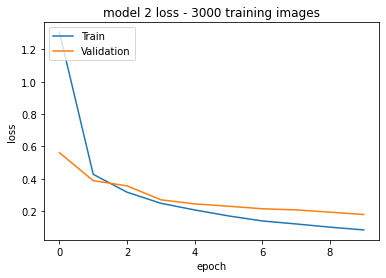

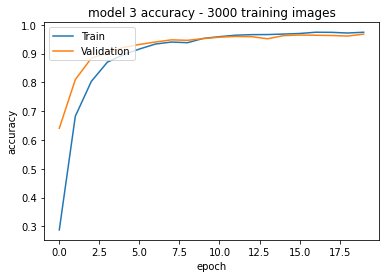

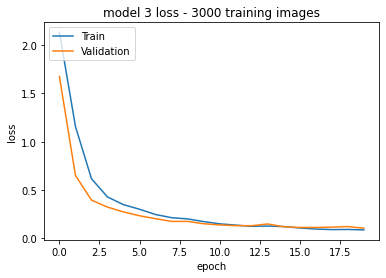

Epoch 1/10
18/18 - 1s - loss: 1.0186 - accuracy: 0.7231 - val_loss: 0.4748 - val_accuracy: 0.8661
Epoch 2/10
18/18 - 0s - loss: 0.3586 - accuracy: 0.8957 - val_loss: 0.3750 - val_accuracy: 0.8855
Epoch 3/10
18/18 - 0s - loss: 0.2589 - accuracy: 0.9263 - val_loss: 0.3291 - val_accuracy: 0.9006
Epoch 4/10
18/18 - 0s - loss: 0.1987 - accuracy: 0.9491 - val_loss: 0.3085 - val_accuracy: 0.9084
Epoch 5/10
18/18 - 0s - loss: 0.1636 - accuracy: 0.9586 - val_loss: 0.2791 - val_accuracy: 0.9199
Epoch 6/10
18/18 - 0s - loss: 0.1318 - accuracy: 0.9689 - val_loss: 0.2653 - val_accuracy: 0.9195
Epoch 7/10
18/18 - 0s - loss: 0.1075 - accuracy: 0.9780 - val_loss: 0.2543 - val_accuracy: 0.9228
Epoch 8/10
18/18 - 0s - loss: 0.0869 - accuracy: 0.9840 - val_loss: 0.2531 - val_accuracy: 0.9221
Epoch 9/10
18/18 - 0s - loss: 0.0765 - accuracy: 0.9869 - val_loss: 0.2425 - val_accuracy: 0.9264
Epoch 10/10
18/18 - 0s - loss: 0.0608 - accuracy: 0.9914 - val_loss: 0.2382 - val_accuracy: 0.9276
Epoch 1/10
18/18 - 

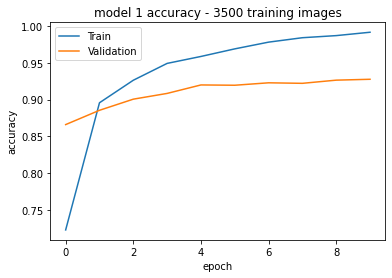

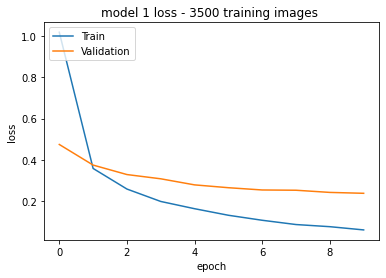

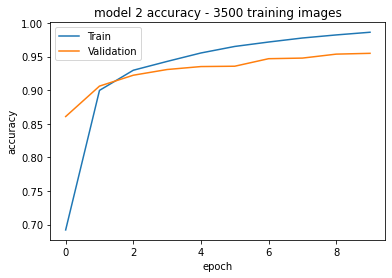

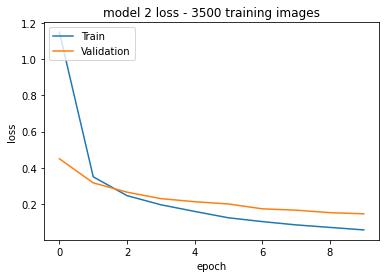

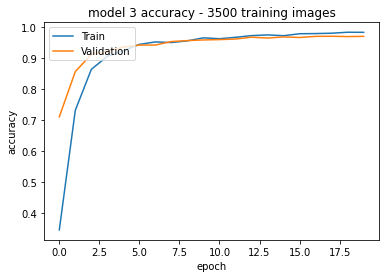

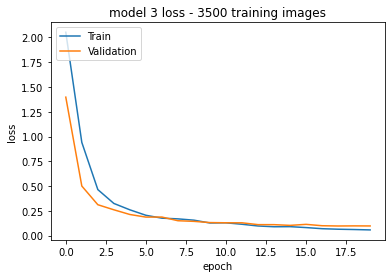

Epoch 1/10
20/20 - 1s - loss: 0.9576 - accuracy: 0.7402 - val_loss: 0.4482 - val_accuracy: 0.8677
Epoch 2/10
20/20 - 0s - loss: 0.3341 - accuracy: 0.9053 - val_loss: 0.3359 - val_accuracy: 0.9013
Epoch 3/10
20/20 - 0s - loss: 0.2396 - accuracy: 0.9350 - val_loss: 0.3062 - val_accuracy: 0.9120
Epoch 4/10
20/20 - 0s - loss: 0.1922 - accuracy: 0.9488 - val_loss: 0.2736 - val_accuracy: 0.9181
Epoch 5/10
20/20 - 0s - loss: 0.1530 - accuracy: 0.9640 - val_loss: 0.2634 - val_accuracy: 0.9189
Epoch 6/10
20/20 - 0s - loss: 0.1258 - accuracy: 0.9710 - val_loss: 0.2540 - val_accuracy: 0.9198
Epoch 7/10
20/20 - 0s - loss: 0.1018 - accuracy: 0.9790 - val_loss: 0.2464 - val_accuracy: 0.9241
Epoch 8/10
20/20 - 0s - loss: 0.0850 - accuracy: 0.9835 - val_loss: 0.2313 - val_accuracy: 0.9297
Epoch 9/10
20/20 - 0s - loss: 0.0683 - accuracy: 0.9887 - val_loss: 0.2329 - val_accuracy: 0.9302
Epoch 10/10
20/20 - 0s - loss: 0.0578 - accuracy: 0.9908 - val_loss: 0.2272 - val_accuracy: 0.9316
Epoch 1/10
20/20 - 

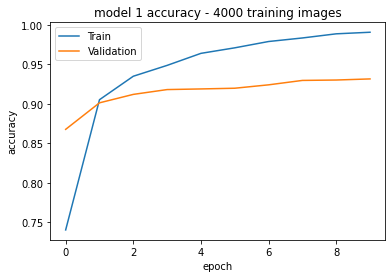

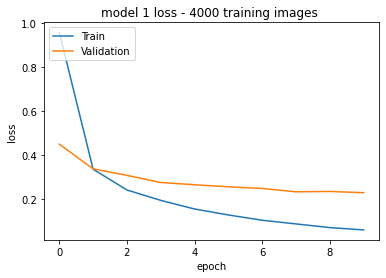

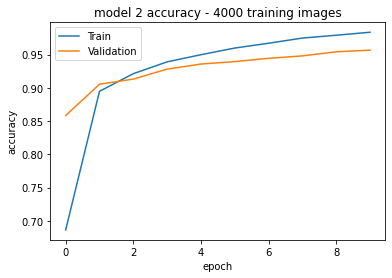

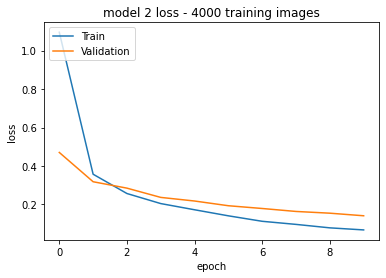

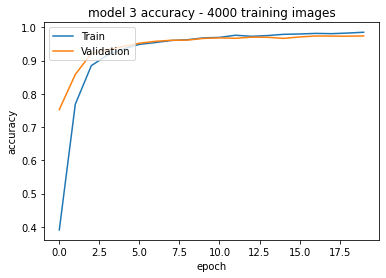

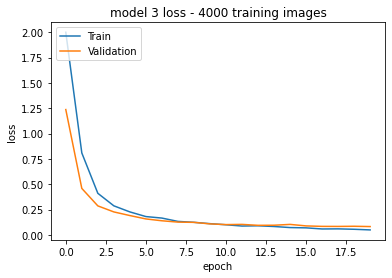

Epoch 1/10
23/23 - 1s - loss: 0.9500 - accuracy: 0.7451 - val_loss: 0.4251 - val_accuracy: 0.8781
Epoch 2/10
23/23 - 0s - loss: 0.3269 - accuracy: 0.9067 - val_loss: 0.3302 - val_accuracy: 0.9051
Epoch 3/10
23/23 - 0s - loss: 0.2406 - accuracy: 0.9336 - val_loss: 0.2924 - val_accuracy: 0.9148
Epoch 4/10
23/23 - 0s - loss: 0.1900 - accuracy: 0.9507 - val_loss: 0.2734 - val_accuracy: 0.9177
Epoch 5/10
23/23 - 0s - loss: 0.1519 - accuracy: 0.9618 - val_loss: 0.2458 - val_accuracy: 0.9261
Epoch 6/10
23/23 - 0s - loss: 0.1214 - accuracy: 0.9704 - val_loss: 0.2356 - val_accuracy: 0.9306
Epoch 7/10
23/23 - 0s - loss: 0.0983 - accuracy: 0.9798 - val_loss: 0.2383 - val_accuracy: 0.9275
Epoch 8/10
23/23 - 0s - loss: 0.0819 - accuracy: 0.9851 - val_loss: 0.2202 - val_accuracy: 0.9362
Epoch 9/10
23/23 - 0s - loss: 0.0692 - accuracy: 0.9873 - val_loss: 0.2159 - val_accuracy: 0.9357
Epoch 10/10
23/23 - 0s - loss: 0.0559 - accuracy: 0.9913 - val_loss: 0.2080 - val_accuracy: 0.9396
Epoch 1/10
23/23 - 

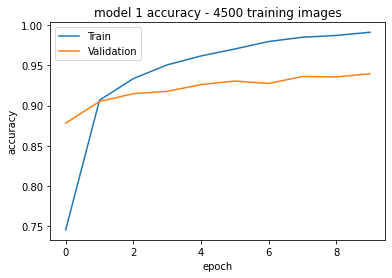

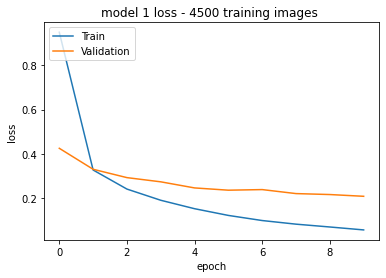

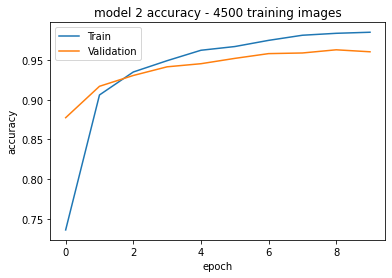

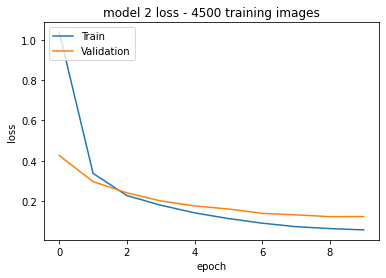

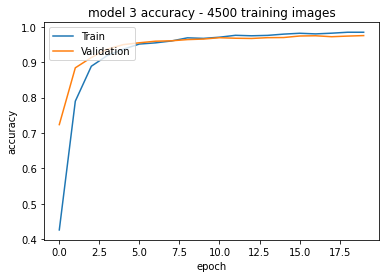

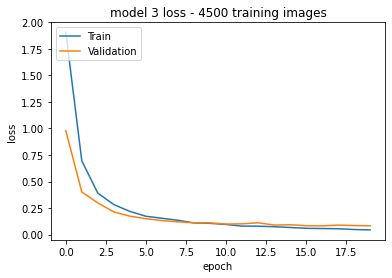

Epoch 1/10
25/25 - 1s - loss: 0.8876 - accuracy: 0.7546 - val_loss: 0.3974 - val_accuracy: 0.8884
Epoch 2/10
25/25 - 0s - loss: 0.3014 - accuracy: 0.9190 - val_loss: 0.3093 - val_accuracy: 0.9115
Epoch 3/10
25/25 - 0s - loss: 0.2178 - accuracy: 0.9424 - val_loss: 0.2679 - val_accuracy: 0.9201
Epoch 4/10
25/25 - 0s - loss: 0.1716 - accuracy: 0.9572 - val_loss: 0.2538 - val_accuracy: 0.9264
Epoch 5/10
25/25 - 0s - loss: 0.1394 - accuracy: 0.9666 - val_loss: 0.2336 - val_accuracy: 0.9283
Epoch 6/10
25/25 - 0s - loss: 0.1085 - accuracy: 0.9774 - val_loss: 0.2203 - val_accuracy: 0.9336
Epoch 7/10
25/25 - 0s - loss: 0.0885 - accuracy: 0.9816 - val_loss: 0.2203 - val_accuracy: 0.9326
Epoch 8/10
25/25 - 0s - loss: 0.0726 - accuracy: 0.9852 - val_loss: 0.2126 - val_accuracy: 0.9378
Epoch 9/10
25/25 - 0s - loss: 0.0594 - accuracy: 0.9888 - val_loss: 0.2020 - val_accuracy: 0.9399
Epoch 10/10
25/25 - 0s - loss: 0.0468 - accuracy: 0.9928 - val_loss: 0.2011 - val_accuracy: 0.9407
Epoch 1/10
25/25 - 

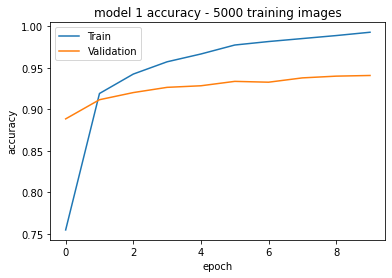

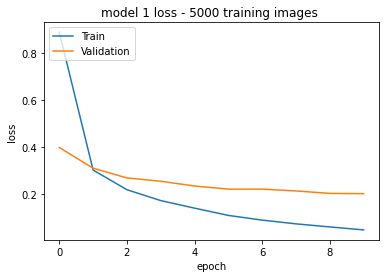

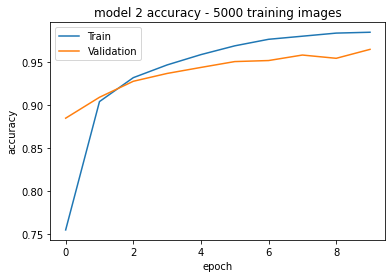

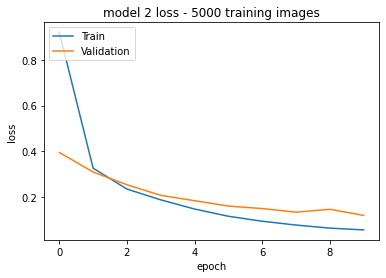

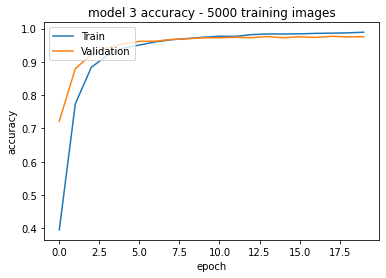

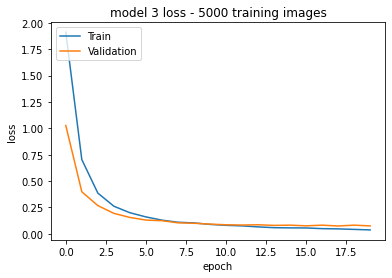

Epoch 1/10
28/28 - 1s - loss: 0.8154 - accuracy: 0.7738 - val_loss: 0.3845 - val_accuracy: 0.8897
Epoch 2/10
28/28 - 0s - loss: 0.3053 - accuracy: 0.9156 - val_loss: 0.3071 - val_accuracy: 0.9103
Epoch 3/10
28/28 - 0s - loss: 0.2167 - accuracy: 0.9407 - val_loss: 0.2662 - val_accuracy: 0.9225
Epoch 4/10
28/28 - 0s - loss: 0.1650 - accuracy: 0.9589 - val_loss: 0.2506 - val_accuracy: 0.9230
Epoch 5/10
28/28 - 0s - loss: 0.1359 - accuracy: 0.9651 - val_loss: 0.2279 - val_accuracy: 0.9318
Epoch 6/10
28/28 - 0s - loss: 0.1062 - accuracy: 0.9765 - val_loss: 0.2219 - val_accuracy: 0.9345
Epoch 7/10
28/28 - 0s - loss: 0.0887 - accuracy: 0.9791 - val_loss: 0.2160 - val_accuracy: 0.9363
Epoch 8/10
28/28 - 0s - loss: 0.0703 - accuracy: 0.9865 - val_loss: 0.2014 - val_accuracy: 0.9407
Epoch 9/10
28/28 - 0s - loss: 0.0549 - accuracy: 0.9916 - val_loss: 0.2027 - val_accuracy: 0.9395
Epoch 10/10
28/28 - 0s - loss: 0.0448 - accuracy: 0.9944 - val_loss: 0.1911 - val_accuracy: 0.9429
Epoch 1/10
28/28 - 

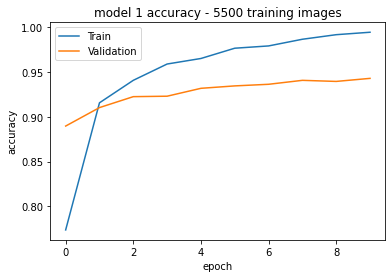

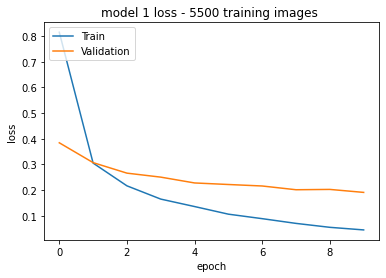

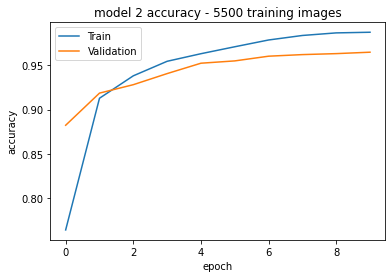

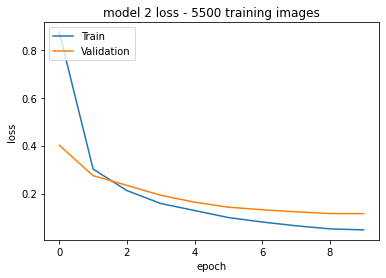

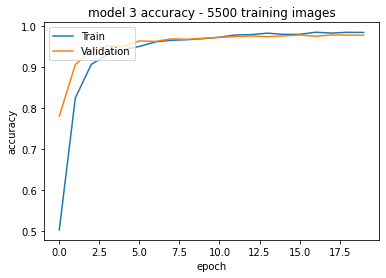

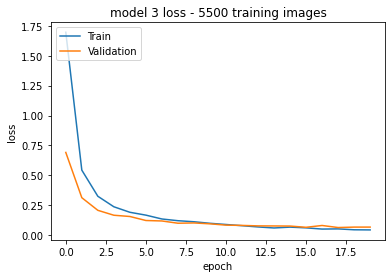

Epoch 1/10
30/30 - 1s - loss: 0.7943 - accuracy: 0.7770 - val_loss: 0.3694 - val_accuracy: 0.8952
Epoch 2/10
30/30 - 0s - loss: 0.2887 - accuracy: 0.9192 - val_loss: 0.2895 - val_accuracy: 0.9163
Epoch 3/10
30/30 - 0s - loss: 0.2081 - accuracy: 0.9437 - val_loss: 0.2580 - val_accuracy: 0.9267
Epoch 4/10
30/30 - 0s - loss: 0.1664 - accuracy: 0.9595 - val_loss: 0.2504 - val_accuracy: 0.9279
Epoch 5/10
30/30 - 0s - loss: 0.1311 - accuracy: 0.9663 - val_loss: 0.2246 - val_accuracy: 0.9346
Epoch 6/10
30/30 - 0s - loss: 0.1012 - accuracy: 0.9760 - val_loss: 0.2151 - val_accuracy: 0.9357
Epoch 7/10
30/30 - 0s - loss: 0.0815 - accuracy: 0.9833 - val_loss: 0.2084 - val_accuracy: 0.9389
Epoch 8/10
30/30 - 0s - loss: 0.0653 - accuracy: 0.9872 - val_loss: 0.1979 - val_accuracy: 0.9411
Epoch 9/10
30/30 - 0s - loss: 0.0538 - accuracy: 0.9910 - val_loss: 0.1946 - val_accuracy: 0.9421
Epoch 10/10
30/30 - 0s - loss: 0.0448 - accuracy: 0.9925 - val_loss: 0.1850 - val_accuracy: 0.9448
Epoch 1/10
30/30 - 

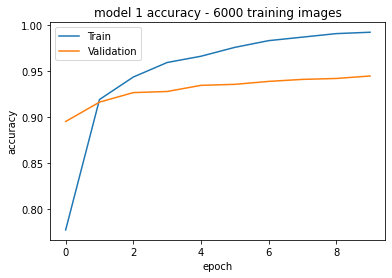

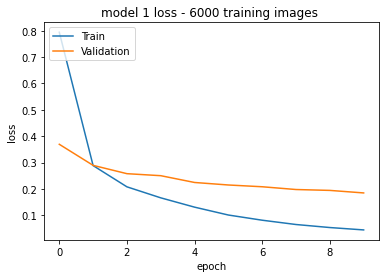

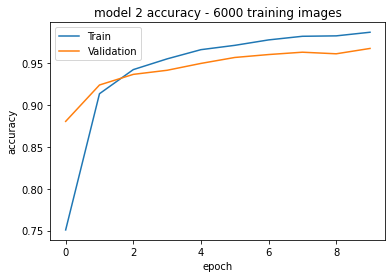

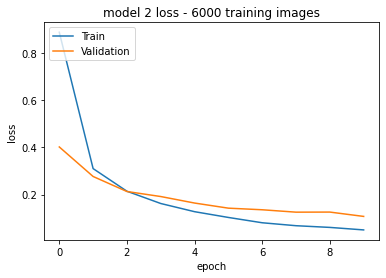

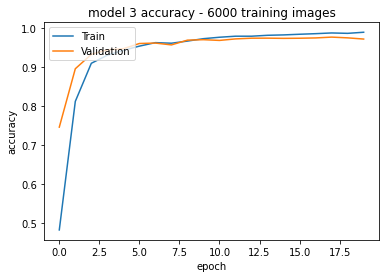

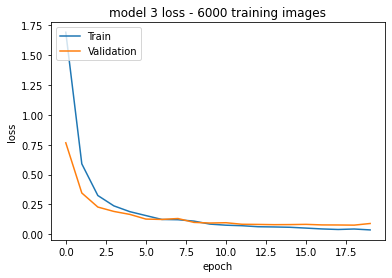

Epoch 1/10
33/33 - 1s - loss: 0.7342 - accuracy: 0.7954 - val_loss: 0.3584 - val_accuracy: 0.8997
Epoch 2/10
33/33 - 0s - loss: 0.2701 - accuracy: 0.9282 - val_loss: 0.2929 - val_accuracy: 0.9161
Epoch 3/10
33/33 - 0s - loss: 0.1994 - accuracy: 0.9460 - val_loss: 0.2571 - val_accuracy: 0.9271
Epoch 4/10
33/33 - 0s - loss: 0.1517 - accuracy: 0.9615 - val_loss: 0.2310 - val_accuracy: 0.9302
Epoch 5/10
33/33 - 0s - loss: 0.1180 - accuracy: 0.9715 - val_loss: 0.2155 - val_accuracy: 0.9346
Epoch 6/10
33/33 - 0s - loss: 0.0955 - accuracy: 0.9785 - val_loss: 0.2065 - val_accuracy: 0.9362
Epoch 7/10
33/33 - 0s - loss: 0.0813 - accuracy: 0.9806 - val_loss: 0.1969 - val_accuracy: 0.9426
Epoch 8/10
33/33 - 0s - loss: 0.0618 - accuracy: 0.9882 - val_loss: 0.1907 - val_accuracy: 0.9407
Epoch 9/10
33/33 - 0s - loss: 0.0477 - accuracy: 0.9929 - val_loss: 0.1812 - val_accuracy: 0.9447
Epoch 10/10
33/33 - 0s - loss: 0.0402 - accuracy: 0.9943 - val_loss: 0.1822 - val_accuracy: 0.9440
Epoch 1/10
33/33 - 

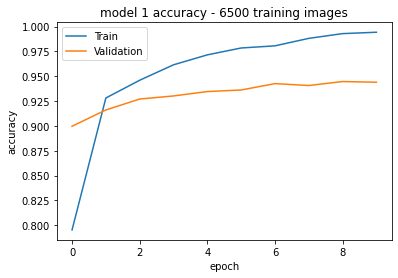

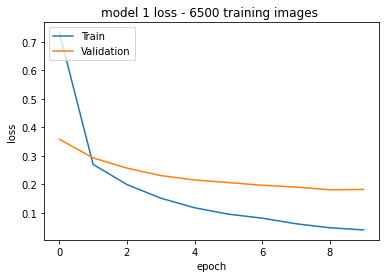

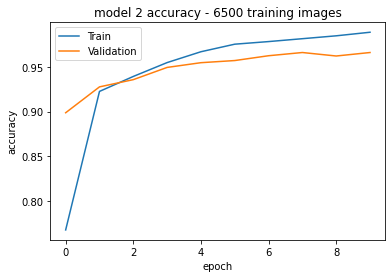

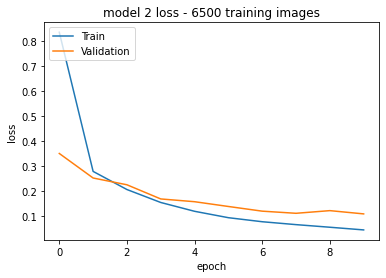

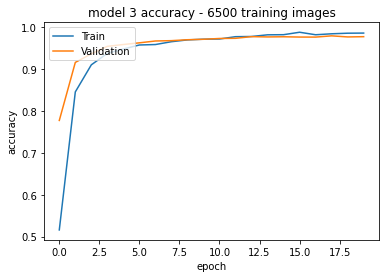

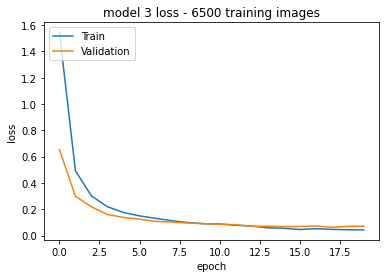

Epoch 1/10
35/35 - 1s - loss: 0.7355 - accuracy: 0.7899 - val_loss: 0.3554 - val_accuracy: 0.8991
Epoch 2/10
35/35 - 0s - loss: 0.2721 - accuracy: 0.9267 - val_loss: 0.2859 - val_accuracy: 0.9202
Epoch 3/10
35/35 - 0s - loss: 0.1998 - accuracy: 0.9476 - val_loss: 0.2502 - val_accuracy: 0.9288
Epoch 4/10
35/35 - 0s - loss: 0.1539 - accuracy: 0.9600 - val_loss: 0.2291 - val_accuracy: 0.9319
Epoch 5/10
35/35 - 0s - loss: 0.1194 - accuracy: 0.9703 - val_loss: 0.2094 - val_accuracy: 0.9380
Epoch 6/10
35/35 - 0s - loss: 0.0953 - accuracy: 0.9786 - val_loss: 0.2048 - val_accuracy: 0.9382
Epoch 7/10
35/35 - 0s - loss: 0.0758 - accuracy: 0.9843 - val_loss: 0.1968 - val_accuracy: 0.9418
Epoch 8/10
35/35 - 0s - loss: 0.0627 - accuracy: 0.9874 - val_loss: 0.1939 - val_accuracy: 0.9395
Epoch 9/10
35/35 - 0s - loss: 0.0500 - accuracy: 0.9909 - val_loss: 0.1866 - val_accuracy: 0.9442
Epoch 10/10
35/35 - 0s - loss: 0.0410 - accuracy: 0.9939 - val_loss: 0.1838 - val_accuracy: 0.9465
Epoch 1/10
35/35 - 

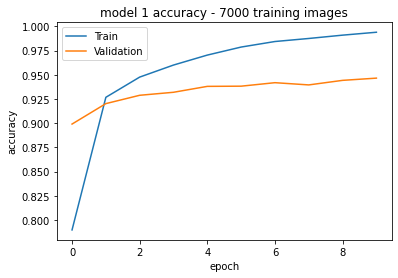

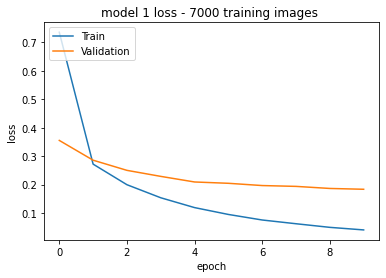

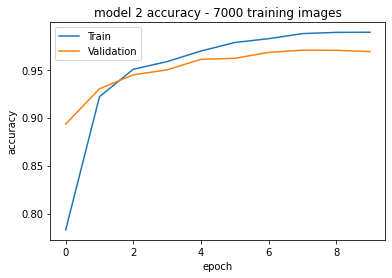

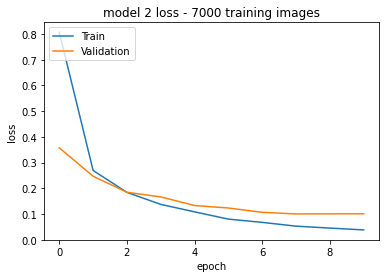

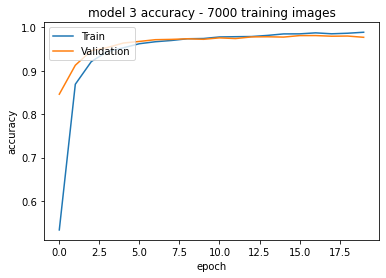

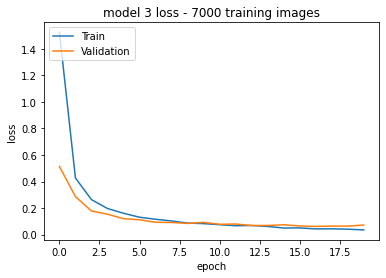

Epoch 1/10
38/38 - 1s - loss: 0.6847 - accuracy: 0.8155 - val_loss: 0.3560 - val_accuracy: 0.8945
Epoch 2/10
38/38 - 0s - loss: 0.2642 - accuracy: 0.9275 - val_loss: 0.2723 - val_accuracy: 0.9217
Epoch 3/10
38/38 - 0s - loss: 0.1969 - accuracy: 0.9472 - val_loss: 0.2384 - val_accuracy: 0.9285
Epoch 4/10
38/38 - 0s - loss: 0.1481 - accuracy: 0.9619 - val_loss: 0.2232 - val_accuracy: 0.9353
Epoch 5/10
38/38 - 0s - loss: 0.1174 - accuracy: 0.9703 - val_loss: 0.2046 - val_accuracy: 0.9369
Epoch 6/10
38/38 - 0s - loss: 0.0912 - accuracy: 0.9781 - val_loss: 0.1916 - val_accuracy: 0.9443
Epoch 7/10
38/38 - 0s - loss: 0.0735 - accuracy: 0.9832 - val_loss: 0.1839 - val_accuracy: 0.9436
Epoch 8/10
38/38 - 0s - loss: 0.0552 - accuracy: 0.9897 - val_loss: 0.1886 - val_accuracy: 0.9414
Epoch 9/10
38/38 - 0s - loss: 0.0458 - accuracy: 0.9927 - val_loss: 0.1762 - val_accuracy: 0.9463
Epoch 10/10
38/38 - 0s - loss: 0.0357 - accuracy: 0.9956 - val_loss: 0.1710 - val_accuracy: 0.9487
Epoch 1/10
38/38 - 

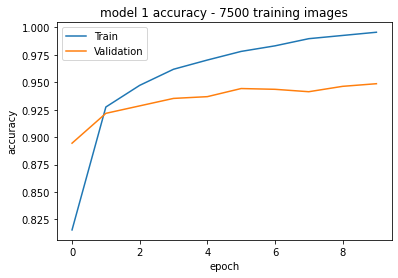

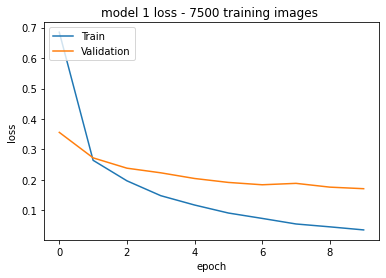

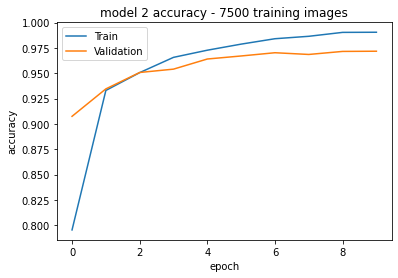

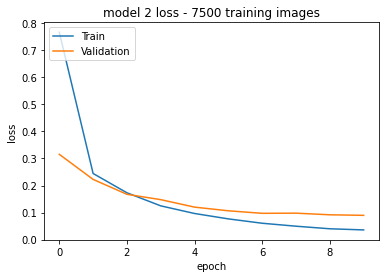

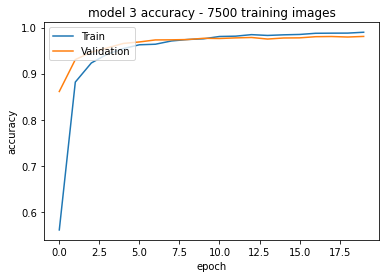

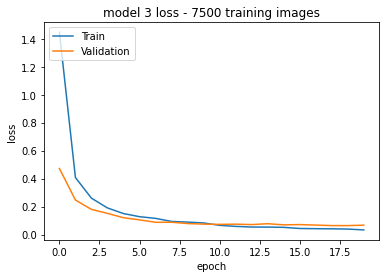

Epoch 1/10
40/40 - 1s - loss: 0.6871 - accuracy: 0.8134 - val_loss: 0.3422 - val_accuracy: 0.9007
Epoch 2/10
40/40 - 0s - loss: 0.2589 - accuracy: 0.9299 - val_loss: 0.2733 - val_accuracy: 0.9194
Epoch 3/10
40/40 - 0s - loss: 0.1920 - accuracy: 0.9491 - val_loss: 0.2400 - val_accuracy: 0.9272
Epoch 4/10
40/40 - 0s - loss: 0.1496 - accuracy: 0.9603 - val_loss: 0.2122 - val_accuracy: 0.9362
Epoch 5/10
40/40 - 0s - loss: 0.1148 - accuracy: 0.9718 - val_loss: 0.1997 - val_accuracy: 0.9391
Epoch 6/10
40/40 - 0s - loss: 0.0929 - accuracy: 0.9784 - val_loss: 0.1851 - val_accuracy: 0.9445
Epoch 7/10
40/40 - 0s - loss: 0.0736 - accuracy: 0.9829 - val_loss: 0.1808 - val_accuracy: 0.9451
Epoch 8/10
40/40 - 0s - loss: 0.0574 - accuracy: 0.9902 - val_loss: 0.1699 - val_accuracy: 0.9495
Epoch 9/10
40/40 - 0s - loss: 0.0444 - accuracy: 0.9933 - val_loss: 0.1735 - val_accuracy: 0.9483
Epoch 10/10
40/40 - 0s - loss: 0.0363 - accuracy: 0.9944 - val_loss: 0.1642 - val_accuracy: 0.9500
Epoch 1/10
40/40 - 

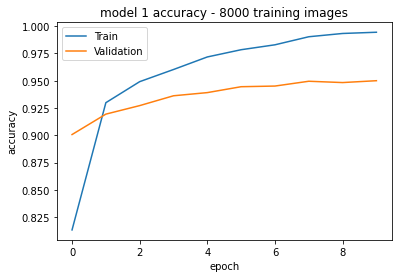

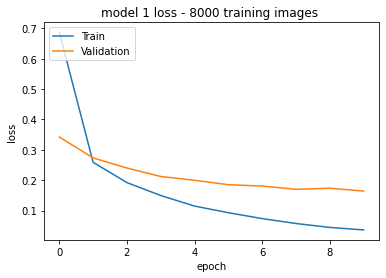

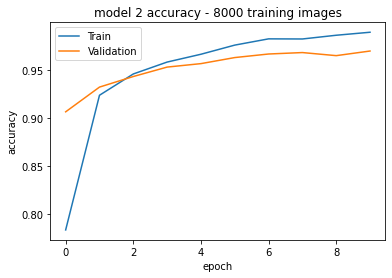

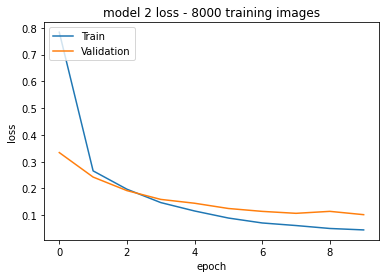

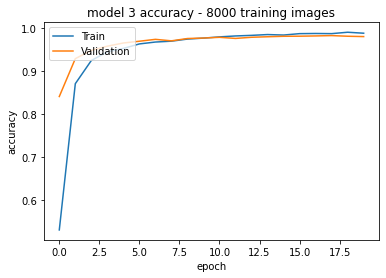

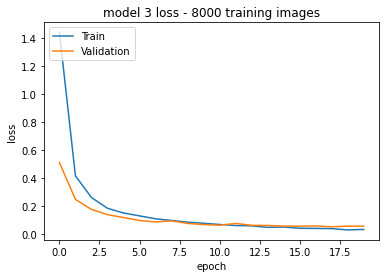

Epoch 1/10
43/43 - 1s - loss: 0.6751 - accuracy: 0.8149 - val_loss: 0.3250 - val_accuracy: 0.9083
Epoch 2/10
43/43 - 0s - loss: 0.2604 - accuracy: 0.9282 - val_loss: 0.2626 - val_accuracy: 0.9245
Epoch 3/10
43/43 - 0s - loss: 0.1930 - accuracy: 0.9485 - val_loss: 0.2470 - val_accuracy: 0.9228
Epoch 4/10
43/43 - 0s - loss: 0.1494 - accuracy: 0.9602 - val_loss: 0.2060 - val_accuracy: 0.9396
Epoch 5/10
43/43 - 0s - loss: 0.1157 - accuracy: 0.9715 - val_loss: 0.2083 - val_accuracy: 0.9395
Epoch 6/10
43/43 - 0s - loss: 0.0925 - accuracy: 0.9781 - val_loss: 0.1855 - val_accuracy: 0.9440
Epoch 7/10
43/43 - 0s - loss: 0.0726 - accuracy: 0.9842 - val_loss: 0.1754 - val_accuracy: 0.9470
Epoch 8/10
43/43 - 0s - loss: 0.0633 - accuracy: 0.9862 - val_loss: 0.1695 - val_accuracy: 0.9487
Epoch 9/10
43/43 - 0s - loss: 0.0477 - accuracy: 0.9909 - val_loss: 0.1717 - val_accuracy: 0.9480
Epoch 10/10
43/43 - 0s - loss: 0.0365 - accuracy: 0.9947 - val_loss: 0.1646 - val_accuracy: 0.9503
Epoch 1/10
43/43 - 

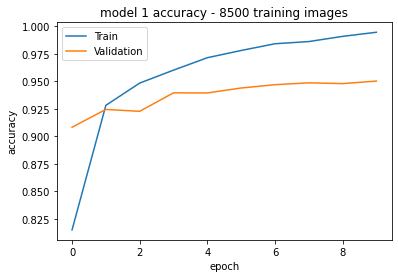

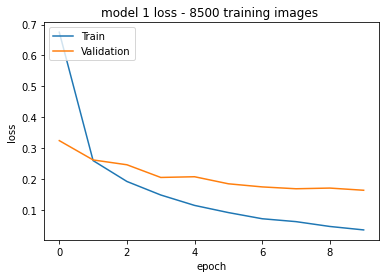

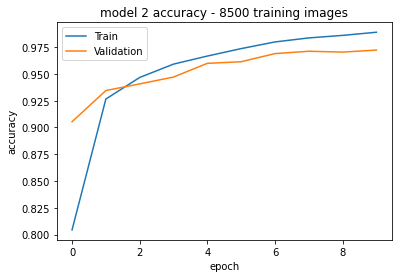

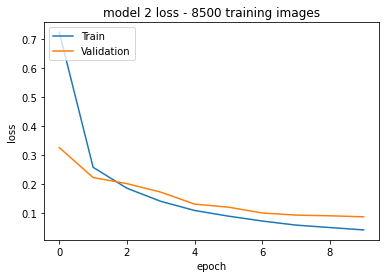

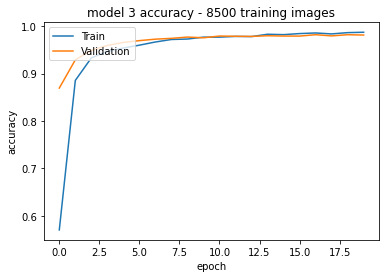

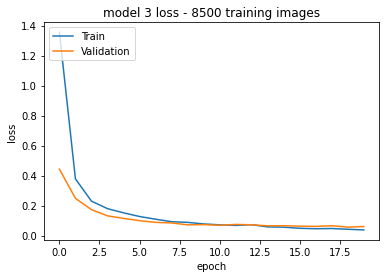

Epoch 1/10
45/45 - 1s - loss: 0.6334 - accuracy: 0.8229 - val_loss: 0.3154 - val_accuracy: 0.9085
Epoch 2/10
45/45 - 0s - loss: 0.2553 - accuracy: 0.9293 - val_loss: 0.2545 - val_accuracy: 0.9293
Epoch 3/10
45/45 - 0s - loss: 0.1839 - accuracy: 0.9491 - val_loss: 0.2160 - val_accuracy: 0.9391
Epoch 4/10
45/45 - 0s - loss: 0.1417 - accuracy: 0.9623 - val_loss: 0.2047 - val_accuracy: 0.9405
Epoch 5/10
45/45 - 0s - loss: 0.1099 - accuracy: 0.9726 - val_loss: 0.1867 - val_accuracy: 0.9417
Epoch 6/10
45/45 - 0s - loss: 0.0884 - accuracy: 0.9769 - val_loss: 0.1830 - val_accuracy: 0.9439
Epoch 7/10
45/45 - 0s - loss: 0.0675 - accuracy: 0.9842 - val_loss: 0.1783 - val_accuracy: 0.9443
Epoch 8/10
45/45 - 0s - loss: 0.0523 - accuracy: 0.9894 - val_loss: 0.1646 - val_accuracy: 0.9496
Epoch 9/10
45/45 - 0s - loss: 0.0409 - accuracy: 0.9933 - val_loss: 0.1587 - val_accuracy: 0.9519
Epoch 10/10
45/45 - 0s - loss: 0.0327 - accuracy: 0.9954 - val_loss: 0.1561 - val_accuracy: 0.9531
Epoch 1/10
45/45 - 

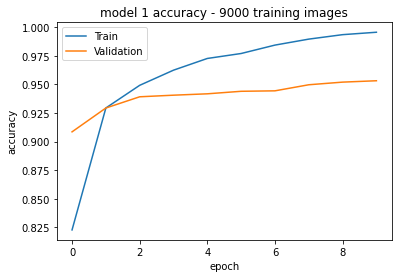

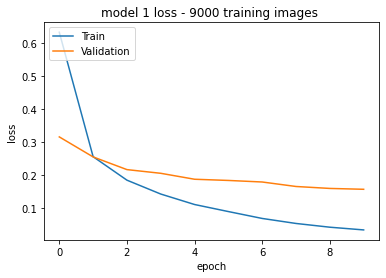

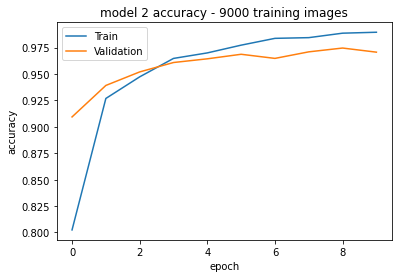

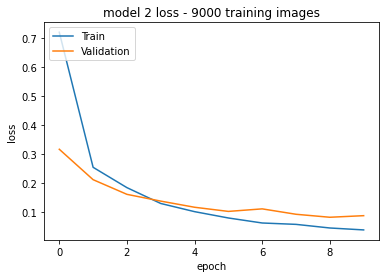

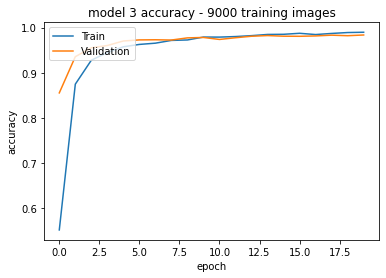

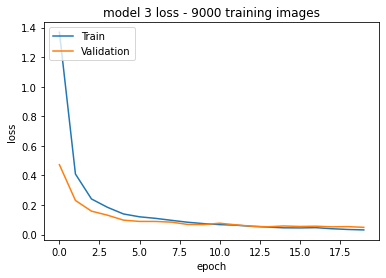

Epoch 1/10
48/48 - 1s - loss: 0.6635 - accuracy: 0.8172 - val_loss: 0.3208 - val_accuracy: 0.9084
Epoch 2/10
48/48 - 0s - loss: 0.2546 - accuracy: 0.9297 - val_loss: 0.2518 - val_accuracy: 0.9258
Epoch 3/10
48/48 - 0s - loss: 0.1865 - accuracy: 0.9477 - val_loss: 0.2170 - val_accuracy: 0.9383
Epoch 4/10
48/48 - 0s - loss: 0.1417 - accuracy: 0.9621 - val_loss: 0.1936 - val_accuracy: 0.9420
Epoch 5/10
48/48 - 0s - loss: 0.1115 - accuracy: 0.9713 - val_loss: 0.1835 - val_accuracy: 0.9436
Epoch 6/10
48/48 - 0s - loss: 0.0855 - accuracy: 0.9796 - val_loss: 0.1691 - val_accuracy: 0.9483
Epoch 7/10
48/48 - 0s - loss: 0.0668 - accuracy: 0.9846 - val_loss: 0.1615 - val_accuracy: 0.9503
Epoch 8/10
48/48 - 0s - loss: 0.0534 - accuracy: 0.9885 - val_loss: 0.1608 - val_accuracy: 0.9515
Epoch 9/10
48/48 - 0s - loss: 0.0434 - accuracy: 0.9917 - val_loss: 0.1664 - val_accuracy: 0.9502
Epoch 10/10
48/48 - 0s - loss: 0.0343 - accuracy: 0.9936 - val_loss: 0.1589 - val_accuracy: 0.9524
Epoch 1/10
48/48 - 

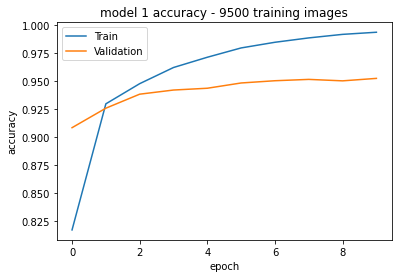

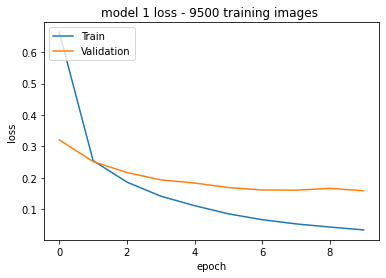

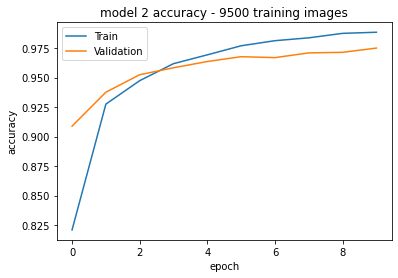

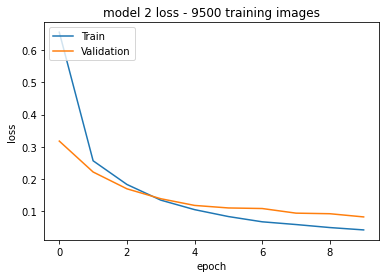

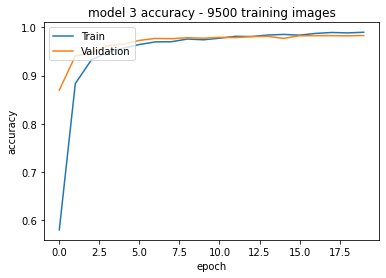

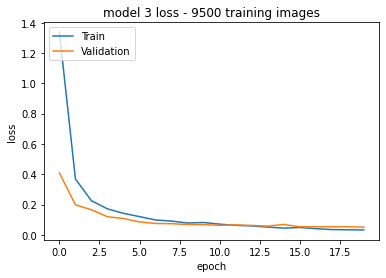

Epoch 1/10
50/50 - 1s - loss: 0.6341 - accuracy: 0.8185 - val_loss: 0.3228 - val_accuracy: 0.9096
Epoch 2/10
50/50 - 0s - loss: 0.2473 - accuracy: 0.9309 - val_loss: 0.2561 - val_accuracy: 0.9271
Epoch 3/10
50/50 - 0s - loss: 0.1818 - accuracy: 0.9492 - val_loss: 0.2178 - val_accuracy: 0.9373
Epoch 4/10
50/50 - 0s - loss: 0.1416 - accuracy: 0.9617 - val_loss: 0.2007 - val_accuracy: 0.9396
Epoch 5/10
50/50 - 0s - loss: 0.1086 - accuracy: 0.9710 - val_loss: 0.1852 - val_accuracy: 0.9444
Epoch 6/10
50/50 - 0s - loss: 0.0847 - accuracy: 0.9793 - val_loss: 0.1701 - val_accuracy: 0.9473
Epoch 7/10
50/50 - 0s - loss: 0.0660 - accuracy: 0.9845 - val_loss: 0.1609 - val_accuracy: 0.9513
Epoch 8/10
50/50 - 0s - loss: 0.0506 - accuracy: 0.9897 - val_loss: 0.1557 - val_accuracy: 0.9529
Epoch 9/10
50/50 - 0s - loss: 0.0417 - accuracy: 0.9919 - val_loss: 0.1565 - val_accuracy: 0.9517
Epoch 10/10
50/50 - 0s - loss: 0.0318 - accuracy: 0.9949 - val_loss: 0.1549 - val_accuracy: 0.9537
Epoch 1/10
50/50 - 

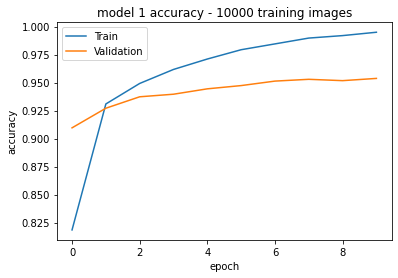

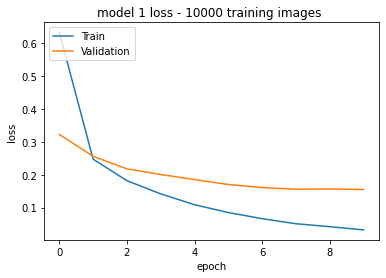

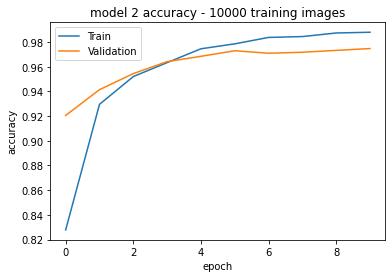

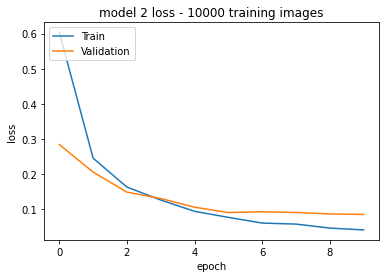

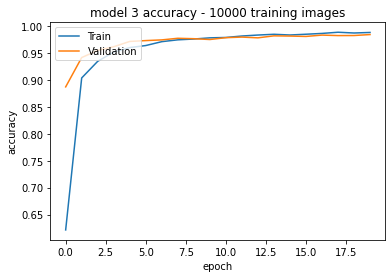

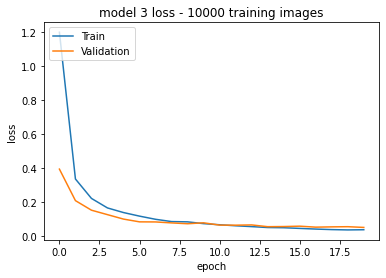

In [58]:
for i in np.linspace(500,10000,20):
    i = int(i)
    # 1D Data for model 1
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], total_pixels)).astype('float')
    X_test = X_test.reshape((X_test.shape[0], total_pixels)).astype('float')

    # normalizing
    X_train = X_train / 255
    X_test = X_test / 255

    # categories
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    # Sampling the 1D data
    X_train_sampled, y_train_sampled = X_train[:i], y_train[:i]

    # training model 1
    model1 = baseline_model()
    history1 = model1.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

    # 2D Data for model 2
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # normalizing
    X_train = X_train / 255
    X_test = X_test / 255

    # categories
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    X_train_sampled, y_train_sampled = X_train[:i], y_train[:i]

    # training model 2
    model2 = cnn_model()
    history2 = model2.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

    # 2D Data for model 3
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # the arguments of reshape are data, length, width, color-filters (3 for rgb, 1 for greyscale)
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

    # normalizing
    X_train = X_train / 255
    X_test = X_test / 255

    # categories
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    X_train_sampled, y_train_sampled = X_train[:i], y_train[:i]

    # training model 3
    model3 = cnn_model2()
    history3 = model3.fit(X_train_sampled, y_train_sampled, validation_data=(X_test, y_test), epochs=20, batch_size=200)

    ## PLOTTING MODEL 1

    # summarize history for accuracy
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
    plt.title(f"model 1 accuracy - {i} training images")
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history1.history['loss'])
    plt.plot(history1.history['val_loss'])
    plt.title(f"model 1 loss - {i} training images ")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    ## PLOTTING MODEL 2

    # summarize history for accuracy
    plt.plot(history2.history['accuracy'])
    plt.plot(history2.history['val_accuracy'])
    plt.title(f'model 2 accuracy - {i} training images')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history2.history['loss'])
    plt.plot(history2.history['val_loss'])
    plt.title(f'model 2 loss - {i} training images')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    ## PLOTTING MODEL 3

    # summarize history for accuracy
    plt.plot(history3.history['accuracy'])
    plt.plot(history3.history['val_accuracy'])
    plt.title(f'model 3 accuracy - {i} training images')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history3.history['loss'])
    plt.plot(history3.history['val_loss'])
    plt.title(f'model 3 loss - {i} training images')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

In [56]:
np.linspace(500,10000,20)

array([  500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,  4000.,
        4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,  8000.,
        8500.,  9000.,  9500., 10000.])